## EXPLORING THE DATA

In [106]:
import pandas as pd
import seaborn as sns
import re

Our goal in this project is to use Data Science Stack Exchange to determine what content should a data science education company create, based on interest by subject.

In [107]:
opened=pd.read_csv('2019_questions.csv',parse_dates=['CreationDate'])
opened.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [108]:
opened.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


From the above we can see only favouritecount column has missing values

In [109]:
opened['FavoriteCount'][opened['FavoriteCount'].notnull()]

6       1.0
17      1.0
22      2.0
35      2.0
48      1.0
       ... 
8802    2.0
8814    2.0
8821    0.0
8834    1.0
8838    0.0
Name: FavoriteCount, Length: 1407, dtype: float64

1) we can replace missing values with zeros because , if there are no one , who saved them as a favorite post, it means the value is zero

2) we need to remove special characters for tags columns , then it will be easy for us to dig into the data

3) we should also change the favoritecount columns to int , there is no advantage of keeping that row in float

4) we will keep all the tags in a list for each row , so that it will be easy to access the tags

## CLEANING DATA

In [110]:
opened['FavoriteCount'].fillna(0,inplace=True)
opened.head()
#filled the missing values with zeros

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,0.0
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,0.0
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,0.0
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,0.0
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,0.0


In [111]:
opened.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [112]:
opened['FavoriteCount']=opened['FavoriteCount'].astype(int)

In [113]:
#cleaning the tags column
opened["Tags"] =opened["Tags"].str.replace("^<|>$", "").str.split("><")
opened.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


# Most Used and Most Viewed

In [114]:
#finding the count of each tags
tag_count = dict()

for tags in opened["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
tag_count

{'machine-learning': 2693,
 'data-mining': 217,
 'regression': 347,
 'linear-regression': 175,
 'regularization': 50,
 'python': 1814,
 'time-series': 466,
 'forecast': 34,
 'forecasting': 85,
 'scikit-learn': 540,
 'pca': 85,
 'dataset': 340,
 'bigdata': 95,
 'data': 213,
 'speech-to-text': 8,
 'fuzzy-logic': 13,
 'anomaly-detection': 92,
 'online-learning': 13,
 'matrix-factorisation': 24,
 'correlation': 80,
 'naive-bayes-classifier': 42,
 'deep-learning': 1220,
 'keras': 935,
 'cnn': 489,
 'theory': 11,
 'gradient-descent': 98,
 'nlp': 493,
 'clustering': 257,
 'feature-extraction': 87,
 'encoding': 54,
 'embeddings': 44,
 'pandas': 354,
 'numpy': 117,
 'decision-trees': 145,
 'accuracy': 89,
 'matlab': 62,
 'reinforcement-learning': 203,
 'q-learning': 37,
 'policy-gradients': 27,
 'neural-network': 1055,
 'image-classification': 211,
 'r': 268,
 'logistic-regression': 154,
 'predictive-modeling': 265,
 'lstm': 402,
 'tensorflow': 584,
 'gpu': 42,
 'data-cleaning': 157,
 'object-d

In [115]:
tagcount=pd.DataFrame.from_dict(tag_count,orient='index')
tagcount=tagcount.groupby(level=0).sum()
tagcount=tagcount.sort_values(0,ascending=False)
tagcount.rename(columns={0:'count'},inplace=True)
tagcount[:15]

,count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


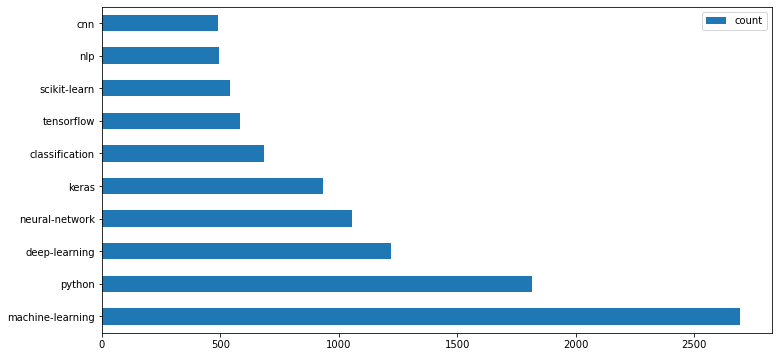

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
tagcount[:10].plot(kind='barh',figsize=(12,6))
plt.show()

From the above graph we can conclude that machine-learning is the most popular tag

In [117]:
#finding views for each tag and show the data on the graph 
tag_view_count = dict()

for Id in opened.index:
    for tags in opened.loc[[Id],['Tags']]['Tags']:
        for tag in tags:
            if tag in tag_view_count:
                tag_view_count[tag]+=[i for i in opened.loc[[Id],['ViewCount']]['ViewCount']][0]
            else:
                tag_view_count[tag]=[i for i in opened.loc[[Id],['ViewCount']]['ViewCount']][0]

Text(0.5, 1.0, 'views for each tag')

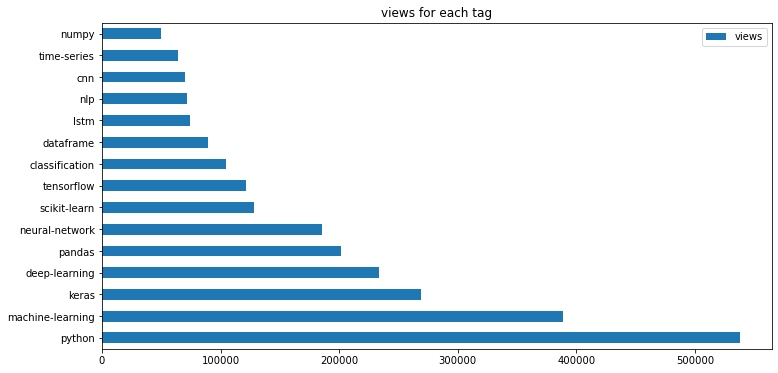

In [118]:
view_count = pd.DataFrame.from_dict(tag_view_count,orient='index')
view_count=view_count.sort_values(0,ascending = False)
view_count.rename(columns={0:'views'},inplace=True)
view_count[:15].plot(kind='barh',figsize=(12,6))
plt.title('views for each tag')

In [119]:
most_used  = tagcount[:20]
most_viewed = view_count[:20]

Let's see what tags are in most_used, but not in most_viewed. We can identify them by the missing values in ViewCount below.

In [120]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used

,count,views
machine-learning,2693,388499.0
python,1814,537585.0
deep-learning,1220,233628.0
neural-network,1055,185367.0
keras,935,268608.0
classification,685,104457.0
tensorflow,584,121369.0
scikit-learn,540,128110.0
nlp,493,71382.0
cnn,489,70349.0


In [121]:
#Similarly, let's see what tags are in the latter, but not the former:
pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

,count,views
python,1814.0,537585
machine-learning,2693.0,388499
keras,935.0,268608
deep-learning,1220.0,233628
pandas,354.0,201787
neural-network,1055.0,185367
scikit-learn,540.0,128110
tensorflow,584.0,121369
classification,685.0,104457
dataframe,NaN,89352


Some tags also stand out as being related. For example, python is related to pandas, as we can find both pythons and pandas in the same country — or better yet, because pandas is a Python library. So by writing about pandas, we can actually simultaneously tackle two tags.

Other pairs of tags, shouldn't be related at all, like pandas and r:

In [122]:
opened[opened["Tags"].apply(
    lambda tags: True if "r" in tags and "pandas" in tags else False)
]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
2873,60074,2019-09-11 20:35:17,0,22,"[r, pandas, dplyr]",0,0
3651,49148,2019-04-11 19:41:39,1,83,"[r, data-mining, pandas, matlab, databases]",3,0


# RELATIONSHIP BETWEEN TAGS

In [123]:
alltags = list(tagcount.index)
alltags

['machine-learning',
 'python',
 'deep-learning',
 'neural-network',
 'keras',
 'classification',
 'tensorflow',
 'scikit-learn',
 'nlp',
 'cnn',
 'time-series',
 'lstm',
 'pandas',
 'regression',
 'dataset',
 'r',
 'predictive-modeling',
 'clustering',
 'statistics',
 'machine-learning-model',
 'data-mining',
 'data',
 'image-classification',
 'feature-selection',
 'reinforcement-learning',
 'data-science-model',
 'pytorch',
 'linear-regression',
 'xgboost',
 'feature-engineering',
 'loss-function',
 'random-forest',
 'data-cleaning',
 'logistic-regression',
 'rnn',
 'training',
 'decision-trees',
 'cross-validation',
 'svm',
 'multiclass-classification',
 'prediction',
 'visualization',
 'optimization',
 'natural-language-process',
 'computer-vision',
 'preprocessing',
 'numpy',
 'word-embeddings',
 'text-mining',
 'convnet',
 'unsupervised-learning',
 'object-detection',
 'autoencoder',
 'recommender-system',
 'convolution',
 'gradient-descent',
 'bigdata',
 'anomaly-detection',
 'm

In [124]:
link = pd.DataFrame(index=alltags,columns=alltags)
link.iloc[:4,:4]

,machine-learning,python,deep-learning,neural-network
machine-learning,NaN,NaN,NaN,NaN
python,NaN,NaN,NaN,NaN
deep-learning,NaN,NaN,NaN,NaN
neural-network,NaN,NaN,NaN,NaN


In [125]:
link.fillna(0,inplace=True)
for tags in opened["Tags"]:
        link.loc[tags,tags]+=1
link


,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,...,multivariate-distribution,marginal-effects,manifold,3d-object-detection,least-squares-svm,lda-classifier,label-smoothing,label-flipping,knime,libsvm
machine-learning,2693,499,429,366,195,259,106,188,113,124,...,0,0,0,0,0,0,0,0,0,1
python,499,1814,160,137,280,98,167,235,71,62,...,0,0,0,0,0,1,0,0,0,0
deep-learning,429,160,1220,305,247,59,136,16,72,160,...,0,0,1,1,0,0,0,0,0,0
neural-network,366,137,305,1055,235,65,108,24,24,118,...,0,0,0,0,0,0,0,0,0,0
keras,195,280,247,235,935,58,256,34,23,116,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lda-classifier,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
label-smoothing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
label-flipping,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
knime,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<ipython-input-126-ca6b122af5e9>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  link.iloc[i,i] = pd.np.NaN


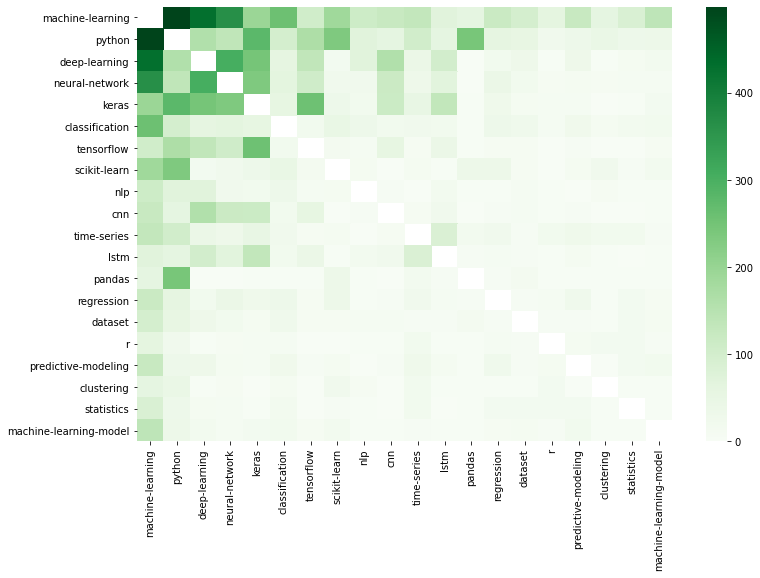

In [126]:
link=link.loc[most_used.index,most_used.index]

for i in range(link.shape[0]):
    link.iloc[i,i] = pd.np.NaN
plt.figure(figsize=(12,8))
sns.heatmap(link,cmap='Greens',annot=False)


The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.


## Could interest in deep learning be slowing down?

#### Count how many deep learning questions are asked per time year.

#### The total amount of questions per year.

#### How many deep learning questions there are relative to the total amount of questions per year.


In [140]:
allquestions=pd.read_csv('all_questions.csv',parse_dates=['CreationDate'])
allquestions


,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...
...,...,...,...
21571,36971,2018-08-15 14:19:01,<statistics><data>
21572,36974,2018-08-15 14:40:27,<machine-learning><neural-network><classifier>
21573,36975,2018-08-15 14:53:43,<machine-learning><classification>
21574,36979,2018-08-14 19:31:43,<tensorflow><python>


In [141]:
allquestions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            21576 non-null  int64         
 1   CreationDate  21576 non-null  datetime64[ns]
 2   Tags          21576 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


In [142]:
allquestions["Tags"] =allquestions["Tags"].str.replace("^<|>$", "").str.split("><")


In [143]:
allquestions

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."
...,...,...,...
21571,36971,2018-08-15 14:19:01,"[statistics, data]"
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]"
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification]"
21574,36979,2018-08-14 19:31:43,"[tensorflow, python]"


In [144]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0
allquestions['Deeplearning']=allquestions['Tags'].apply(class_deep_learning)
allquestions

,Id,CreationDate,Tags,Deeplearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
...,...,...,...,...
21571,36971,2018-08-15 14:19:01,"[statistics, data]",0
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]",1
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification]",0
21574,36979,2018-08-14 19:31:43,"[tensorflow, python]",1


In [145]:
allquestions=allquestions[allquestions['CreationDate'].dt.year<2020]
allquestions

,Id,CreationDate,Tags,Deeplearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
...,...,...,...,...
21571,36971,2018-08-15 14:19:01,"[statistics, data]",0
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]",1
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification]",0
21574,36979,2018-08-14 19:31:43,"[tensorflow, python]",1


In [146]:
allquestions['year']=((allquestions['CreationDate'].dt.year)-2000)
allquestions

<ipython-input-146-ff97090a05cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allquestions['year']=((allquestions['CreationDate'].dt.year)-2000)


,Id,CreationDate,Tags,Deeplearning,year
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19
1,45418,2019-02-12 00:50:39,[neural-network],1,19
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19
3,45426,2019-02-12 04:51:49,[keras],1,19
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19
...,...,...,...,...,...
21571,36971,2018-08-15 14:19:01,"[statistics, data]",0,18
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]",1,18
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification]",0,18
21574,36979,2018-08-14 19:31:43,"[tensorflow, python]",1,18


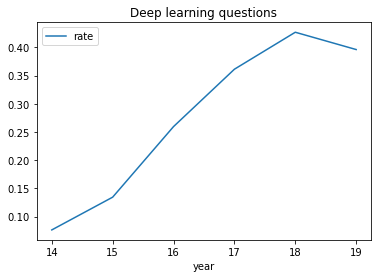

In [153]:
fin=allquestions.groupby('year').agg(['sum','size'])['Deeplearning']
fin.rename(columns={'sum':'deep_learning_ques','size':'total_ques'},inplace=True)
fin['rate']=fin['deep_learning_ques']/fin['total_ques']
fin.plot(kind='line',y='rate',title='Deep learning questions')

It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.